In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv('../Seed_Data.csv')
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [18]:
cov = np.cov(df.values.T)
cov

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [19]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

In [20]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

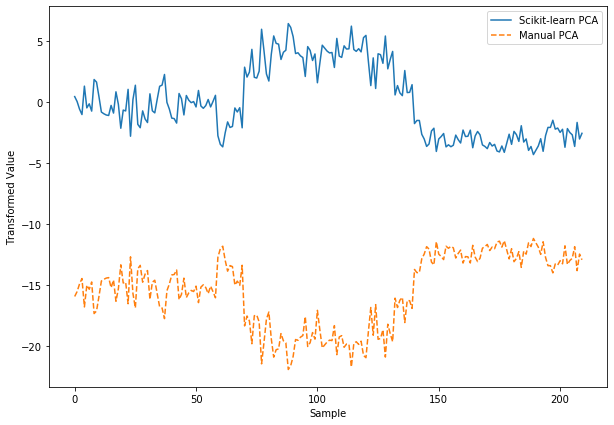

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [22]:
model.components_

array([[0.98965371, 0.14347657]])

In [23]:
P

array([-0.98965371, -0.14347657])

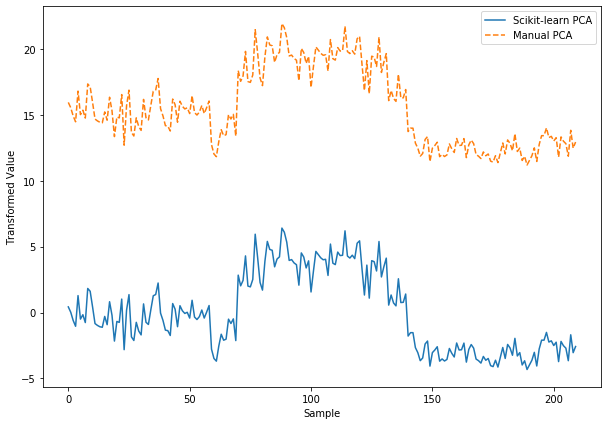

In [24]:
manual_pca *= -1
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [25]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [26]:
manual_pca *= -1

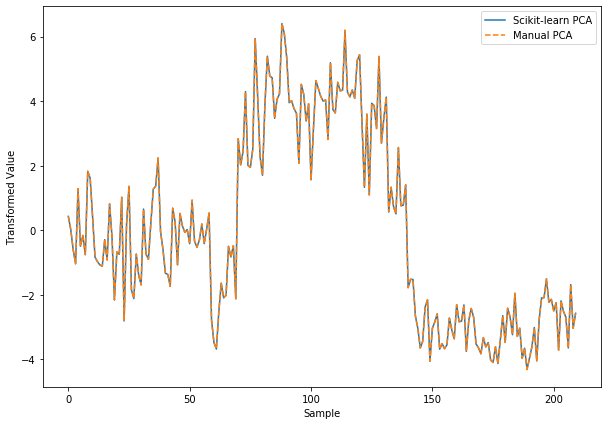

In [27]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()